In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Aim of the Project

Our aim is to predict the outcome of the home team's football matches (win, draw, loss).


## Problem Defintion  :

did the home team win, lose or draw? 

To do this, we found a dataset containing all the information and results of French league football matches (Ligue 1).

We found this dataset at the following address: <br>https://www.kaggle.com/datasets/antoinelebrundu13/ligue-1-season-2022-2023

# Data Understanding

In [3]:
dataset = pd.read_csv("MatchDetailStats_20222023.csv",sep=';', encoding="ISO-8859-1")

dataset

,MatchId,Journee,Stade,Spectateurs,Date,home_team,away_team,home_goal,away_goal,home_possession,...,home_tirs,away_tirs,home_tirs_cadres,away_tirs_cadres,home_carton_jaune,away_carton_jaune,home_carton_rouge,away_carton_rouge,home_formation,away_formation
0,70850,Journée 10,STADE RAYMOND-KOPA,7970.0,DIM. 9 OCTOBRE 2022- 15:00,ANGERS SCO,RC STRASBOURG ALSACE,2,3,"54,5",...,14.0,15.0,8.0,7.0,1.0,1.0,0.0,0.0,2-2-2-2-2,5-3-2
1,70851,Journée 10,STADE FRANCIS-LE BLÉ,9819.0,DIM. 9 OCTOBRE 2022- 15:00,STADE BRESTOIS 29,FC LORIENT,1,2,"50,3",...,11.0,14.0,4.0,5.0,3.0,1.0,0.0,0.0,2-2-2-2-2,3-2-2-2-1
2,70852,Journée 10,STADE GABRIEL-MONTPIED,11119.0,DIM. 9 OCTOBRE 2022- 15:00,CLERMONT FOOT 63,AJ AUXERRE,2,1,"47,9",...,10.0,14.0,6.0,5.0,0.0,0.0,0.0,0.0,3-2-2-2-1,4-1-2-2-1
3,70853,Journée 10,DECATHLON ARENA  STADE PIERRE-MAUROY,48527.0,DIM. 9 OCTOBRE 2022- 20:45,LOSC LILLE,RC LENS,1,0,"45,3",...,12.0,10.0,6.0,3.0,3.0,5.0,0.0,0.0,2-2-2-3-1,2-2-2-3-1
4,70854,Journée 10,GROUPAMA STADIUM,41495.0,VEN. 7 OCTOBRE 2022- 21:00,OLYMPIQUE LYONNAIS,TOULOUSE FC,1,1,58,...,19.0,5.0,8.0,2.0,2.0,2.0,0.0,0.0,2-2-2-3-1,2-2-1-2-2-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,70845,Journée 9,STADE LOUIS-II,5202.0,DIM. 2 OCTOBRE 2022- 17:05,AS MONACO,FC NANTES,4,1,48,...,10.0,7.0,6.0,2.0,0.0,1.0,0.0,0.0,2-2-2-2-2,2-2-2-3-1
375,70846,Journée 9,PARC DES PRINCES,47926.0,SAM. 1 OCTOBRE 2022- 21:00,PARIS SAINT-GERMAIN,OGC NICE,2,1,"57,3",...,12.0,4.0,4.0,1.0,1.0,1.0,0.0,0.0,3-2-2-2-1,2-2-2-3-1
376,70847,Journée 9,STADE DE LA MEINAU,25226.0,SAM. 1 OCTOBRE 2022- 17:00,RC STRASBOURG ALSACE,STADE RENNAIS FC,1,3,"38,9",...,9.0,17.0,3.0,7.0,0.0,2.0,1.0,0.0,3-5-2,2-2-2-2-2
377,70848,Journée 9,STADIUM,21761.0,DIM. 2 OCTOBRE 2022- 15:00,TOULOUSE FC,MONTPELLIER HÉRAULT SC,4,2,"43,2",...,12.0,23.0,6.0,6.0,3.0,4.0,1.0,0.0,2-2-1-2-2-1,3-2-2-2-1


Here we can see that our dataset contains 379 rows, representing 379 different matches. Each row is made up of 35 columns representing different data (day, number of goals, team names, etc.).

However, a very large number of lines contain unnecessary information. For example, the number of spectators, the date, the name of the stadium... All this information has no real influence on the result of the match.
It is therefore necessary to remove them.

# Creating the result dataframe

In [4]:
result = dataset.loc[:, ['home_goal', 'away_goal']]

conditions = [
    result['home_goal'] < result['away_goal'],
    result['home_goal'] == result['away_goal'],
    result['home_goal'] > result['away_goal']
]

# Values ​​to assign based on conditions
valeurs = [-1, 0, 1]

# Using np.select() to assign values ​​based on conditions
result['resultat'] = np.select(conditions, valeurs, default=np.nan)
result

,home_goal,away_goal,resultat
0,2,3,-1.0
1,1,2,-1.0
2,2,1,1.0
3,1,0,1.0
4,1,1,0.0
...,...,...,...
374,4,1,1.0
375,2,1,1.0
376,1,3,-1.0
377,4,2,1.0


In our dataset, we don't have columns for wins, losses or draws. We only have the number of goals scored by each team. So this function creates a new column containing -1 if the home team loses, 0 if there is a draw and 1 if the home team wins.

In order to make more realistic predictions, we decided to remove the columns containing the number of goals scored by the two teams from our dataset, using the following code.

In [5]:
columns_to_delete = ['home_goal', 'away_goal']
dataset = dataset.drop(columns_to_delete, axis=1)
dataset

,MatchId,Journee,Stade,Spectateurs,Date,home_team,away_team,home_possession,away_possession,home_duels_gagnes,...,home_tirs,away_tirs,home_tirs_cadres,away_tirs_cadres,home_carton_jaune,away_carton_jaune,home_carton_rouge,away_carton_rouge,home_formation,away_formation
0,70850,Journée 10,STADE RAYMOND-KOPA,7970.0,DIM. 9 OCTOBRE 2022- 15:00,ANGERS SCO,RC STRASBOURG ALSACE,"54,5","45,5","50,4",...,14.0,15.0,8.0,7.0,1.0,1.0,0.0,0.0,2-2-2-2-2,5-3-2
1,70851,Journée 10,STADE FRANCIS-LE BLÉ,9819.0,DIM. 9 OCTOBRE 2022- 15:00,STADE BRESTOIS 29,FC LORIENT,"50,3","49,7","48,2",...,11.0,14.0,4.0,5.0,3.0,1.0,0.0,0.0,2-2-2-2-2,3-2-2-2-1
2,70852,Journée 10,STADE GABRIEL-MONTPIED,11119.0,DIM. 9 OCTOBRE 2022- 15:00,CLERMONT FOOT 63,AJ AUXERRE,"47,9","52,1","60,2",...,10.0,14.0,6.0,5.0,0.0,0.0,0.0,0.0,3-2-2-2-1,4-1-2-2-1
3,70853,Journée 10,DECATHLON ARENA  STADE PIERRE-MAUROY,48527.0,DIM. 9 OCTOBRE 2022- 20:45,LOSC LILLE,RC LENS,"45,3","54,7","43,1",...,12.0,10.0,6.0,3.0,3.0,5.0,0.0,0.0,2-2-2-3-1,2-2-2-3-1
4,70854,Journée 10,GROUPAMA STADIUM,41495.0,VEN. 7 OCTOBRE 2022- 21:00,OLYMPIQUE LYONNAIS,TOULOUSE FC,58,42,57,...,19.0,5.0,8.0,2.0,2.0,2.0,0.0,0.0,2-2-2-3-1,2-2-1-2-2-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,70845,Journée 9,STADE LOUIS-II,5202.0,DIM. 2 OCTOBRE 2022- 17:05,AS MONACO,FC NANTES,48,52,"54,1",...,10.0,7.0,6.0,2.0,0.0,1.0,0.0,0.0,2-2-2-2-2,2-2-2-3-1
375,70846,Journée 9,PARC DES PRINCES,47926.0,SAM. 1 OCTOBRE 2022- 21:00,PARIS SAINT-GERMAIN,OGC NICE,"57,3","42,7","43,9",...,12.0,4.0,4.0,1.0,1.0,1.0,0.0,0.0,3-2-2-2-1,2-2-2-3-1
376,70847,Journée 9,STADE DE LA MEINAU,25226.0,SAM. 1 OCTOBRE 2022- 17:00,RC STRASBOURG ALSACE,STADE RENNAIS FC,"38,9","61,1","55,3",...,9.0,17.0,3.0,7.0,0.0,2.0,1.0,0.0,3-5-2,2-2-2-2-2
377,70848,Journée 9,STADIUM,21761.0,DIM. 2 OCTOBRE 2022- 15:00,TOULOUSE FC,MONTPELLIER HÉRAULT SC,"43,2","56,8","45,7",...,12.0,23.0,6.0,6.0,3.0,4.0,1.0,0.0,2-2-1-2-2-1,3-2-2-2-1


# Data Cleaning


Now we're going to delete the unnecessary columns.

We did this in 2 stages. 

First of all, we studied the dataset in order to remove columns that we felt were unnecessary, such as the matchID, the day, the number of spectators, etc.

In [6]:
column_to_delete = ['MatchId', 'Journee', 'Stade', 'Spectateurs', 'Date', 'home_team', 'away_team', 'home_formation', 'away_formation '] 
dataset = dataset.drop(column_to_delete, axis=1)

dataset

,home_possession,away_possession,home_duels_gagnes,away_duel_gagnes,home_duel_aeriens_gagnes,away_duel_aeriens_gagnes,home_interceptions,away_interceptions,home_hors_jeux,away_hors_eux,...,home_centres,away_centres,home_tirs,away_tirs,home_tirs_cadres,away_tirs_cadres,home_carton_jaune,away_carton_jaune,home_carton_rouge,away_carton_rouge
0,"54,5","45,5","50,4","49,6","45,5","54,5",10.0,7.0,1.0,3.0,...,14.0,26.0,14.0,15.0,8.0,7.0,1.0,1.0,0.0,0.0
1,"50,3","49,7","48,2","51,8","31,6","68,4",10.0,15.0,0.0,1.0,...,34.0,20.0,11.0,14.0,4.0,5.0,3.0,1.0,0.0,0.0
2,"47,9","52,1","60,2","39,8","58,8","41,2",7.0,12.0,5.0,0.0,...,19.0,17.0,10.0,14.0,6.0,5.0,0.0,0.0,0.0,0.0
3,"45,3","54,7","43,1","56,9","41,7","58,3",13.0,9.0,0.0,2.0,...,13.0,20.0,12.0,10.0,6.0,3.0,3.0,5.0,0.0,0.0
4,58,42,57,43,64,36,7.0,10.0,2.0,1.0,...,13.0,14.0,19.0,5.0,8.0,2.0,2.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,48,52,"54,1","45,9",40,60,12.0,12.0,4.0,0.0,...,14.0,20.0,10.0,7.0,6.0,2.0,0.0,1.0,0.0,0.0
375,"57,3","42,7","43,9","56,1",50,50,5.0,11.0,3.0,2.0,...,8.0,12.0,12.0,4.0,4.0,1.0,1.0,1.0,0.0,0.0
376,"38,9","61,1","55,3","44,7","62,5","37,5",16.0,9.0,3.0,2.0,...,11.0,19.0,9.0,17.0,3.0,7.0,0.0,2.0,1.0,0.0
377,"43,2","56,8","45,7","54,3",72,28,12.0,6.0,1.0,3.0,...,9.0,34.0,12.0,23.0,6.0,6.0,3.0,4.0,1.0,0.0


After deleting these columns, we still had a huge number of columns (24). So we had to find a way of removing some of them. We therefore decided to create a correlation matrix between all the columns in order to find those most correlated with the result column.

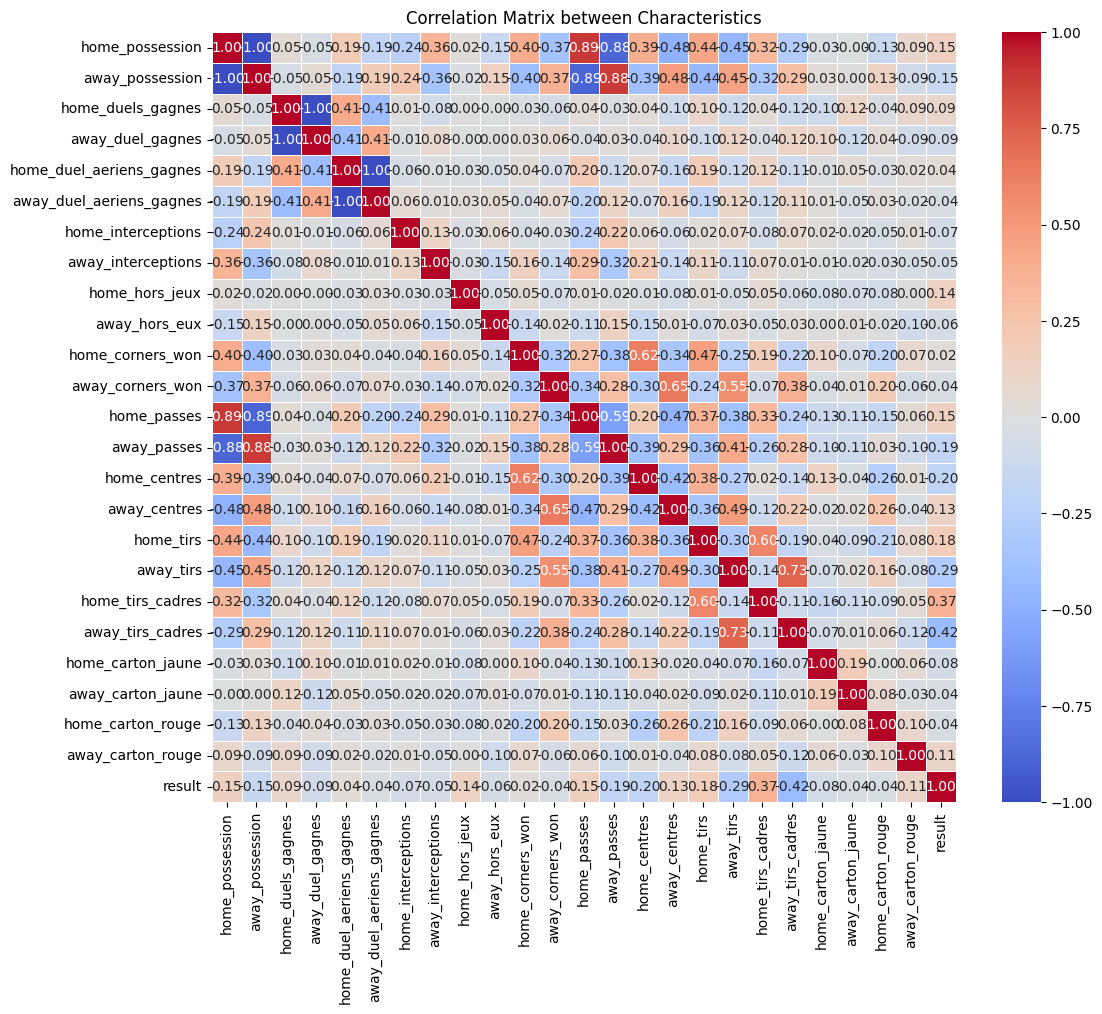

In [7]:
dataset['result'] = result['resultat']
dataset = dataset.replace(',','.', regex=True)

correlation_matrix = dataset.corr()

# Display a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix between Characteristics")
plt.show()

(the error displayed is normal because we haven't yet processed the potential null values present in our dataset)

This correlation matrix therefore represents all the correlation values between each feature. 

The closer a value is to 1, the more positively correlated the 2 columns are. In other words, as one increases, so does the second. For example, between home_centres and home_corners_won we have a correlation of 0.62. This means that the more home team centres, the greater the chance of a corner being scored by the home team.

The closer a value is to -1, this means that the 2 columns are negatively correlated. In other words, the more one increases, the more the other decreases. For example, between result and away_tirs_cadres we have a correlation of -0.42. This means that the more shots on target by the away team, the smaller the value of result becomes, i.e. the greater the chance of having -1 in result, i.e. the defeat of the home team.

Now that we have produced this correlation matrix, we have decided to keep only the 10 columns most correlated with result (negatively or positively) and to delete the others.

In [8]:
column_to_delete2 = ['home_carton_rouge', 'away_carton_rouge', 'home_interceptions', 'away_interceptions', 'home_carton_jaune', 'away_carton_jaune', 'home_duels_gagnes', 'away_duel_gagnes', 'home_duel_aeriens_gagnes', 'away_duel_aeriens_gagnes', 'home_hors_jeux', 'away_hors_eux', 'home_corners_won', 'away_corners_won']

dataset = dataset.drop(column_to_delete2, axis=1)

dataset

,home_possession,away_possession,home_passes,away_passes,home_centres,away_centres,home_tirs,away_tirs,home_tirs_cadres,away_tirs_cadres,result
0,54.5,45.5,524.0,425.0,14.0,26.0,14.0,15.0,8.0,7.0,-1.0
1,50.3,49.7,437.0,445.0,34.0,20.0,11.0,14.0,4.0,5.0,-1.0
2,47.9,52.1,395.0,431.0,19.0,17.0,10.0,14.0,6.0,5.0,1.0
3,45.3,54.7,366.0,432.0,13.0,20.0,12.0,10.0,6.0,3.0,1.0
4,58,42,556.0,399.0,13.0,14.0,19.0,5.0,8.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
374,48,52,476.0,514.0,14.0,20.0,10.0,7.0,6.0,2.0,1.0
375,57.3,42.7,663.0,485.0,8.0,12.0,12.0,4.0,4.0,1.0,1.0
376,38.9,61.1,384.0,603.0,11.0,19.0,9.0,17.0,3.0,7.0,-1.0
377,43.2,56.8,342.0,432.0,9.0,34.0,12.0,23.0,6.0,6.0,1.0


We now have just 11 columns, including the result column.

## Handling null values

We're now going to look at our dataset to see if there are any null values

In [9]:
dataset[dataset.isnull().any(axis=1)]

,home_possession,away_possession,home_passes,away_passes,home_centres,away_centres,home_tirs,away_tirs,home_tirs_cadres,away_tirs_cadres,result
78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0


This command returns all lines containing at least one NaN value (a null value). We obtain a single line containing null values and as this line only contains null values we delete it using the following command

In [10]:
result = result.drop(78)
dataset = dataset.drop(78)
dataset[dataset.isnull().any(axis=1)]

,home_possession,away_possession,home_passes,away_passes,home_centres,away_centres,home_tirs,away_tirs,home_tirs_cadres,away_tirs_cadres,result


Here we are transforming all the dataset values into floats, so that we can treat them as numerical values later on

In [11]:
dataset = dataset.replace(',','.', regex=True)
dataset = dataset.astype(float)
dataset

,home_possession,away_possession,home_passes,away_passes,home_centres,away_centres,home_tirs,away_tirs,home_tirs_cadres,away_tirs_cadres,result
0,54.5,45.5,524.0,425.0,14.0,26.0,14.0,15.0,8.0,7.0,-1.0
1,50.3,49.7,437.0,445.0,34.0,20.0,11.0,14.0,4.0,5.0,-1.0
2,47.9,52.1,395.0,431.0,19.0,17.0,10.0,14.0,6.0,5.0,1.0
3,45.3,54.7,366.0,432.0,13.0,20.0,12.0,10.0,6.0,3.0,1.0
4,58.0,42.0,556.0,399.0,13.0,14.0,19.0,5.0,8.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
374,48.0,52.0,476.0,514.0,14.0,20.0,10.0,7.0,6.0,2.0,1.0
375,57.3,42.7,663.0,485.0,8.0,12.0,12.0,4.0,4.0,1.0,1.0
376,38.9,61.1,384.0,603.0,11.0,19.0,9.0,17.0,3.0,7.0,-1.0
377,43.2,56.8,342.0,432.0,9.0,34.0,12.0,23.0,6.0,6.0,1.0


## Data analysis

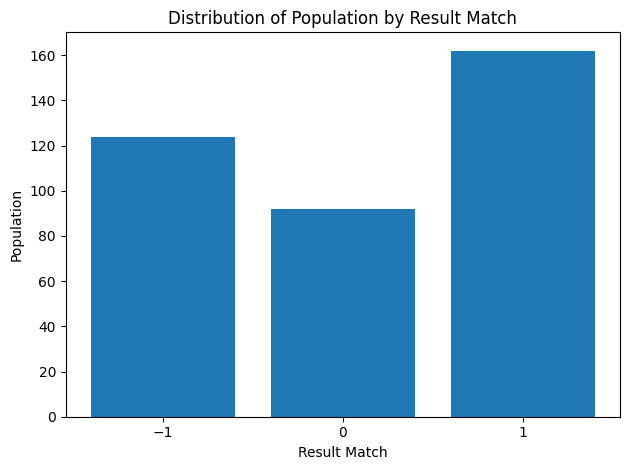

In [12]:
# Count the occurrences for each value of 'quality' in dataset_red
quality_counts_red = result['resultat'].value_counts().sort_index()

# Bar plot for dataset_red
plt.bar(quality_counts_red.index, quality_counts_red.values)
plt.xlabel('Result Match')
plt.ylabel('Population')
plt.title('Distribution of Population by Result Match')

plt.xticks([-1,0,1])
# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()



This diagram allow us to see the diversity of the population in this 3 labels. As you can see we have more example of win (1) than a null (0). So it can be one of the reason of the bad prediction of null. Concerning the label -1 (loose), we have around 125 example so it's not a big difference with label 1.

In order to obtain better results when using the different prediction algorithms, it is necessary to have more or less the same number of data items in each label (0, 1, -1).

<function matplotlib.pyplot.show(close=None, block=None)>

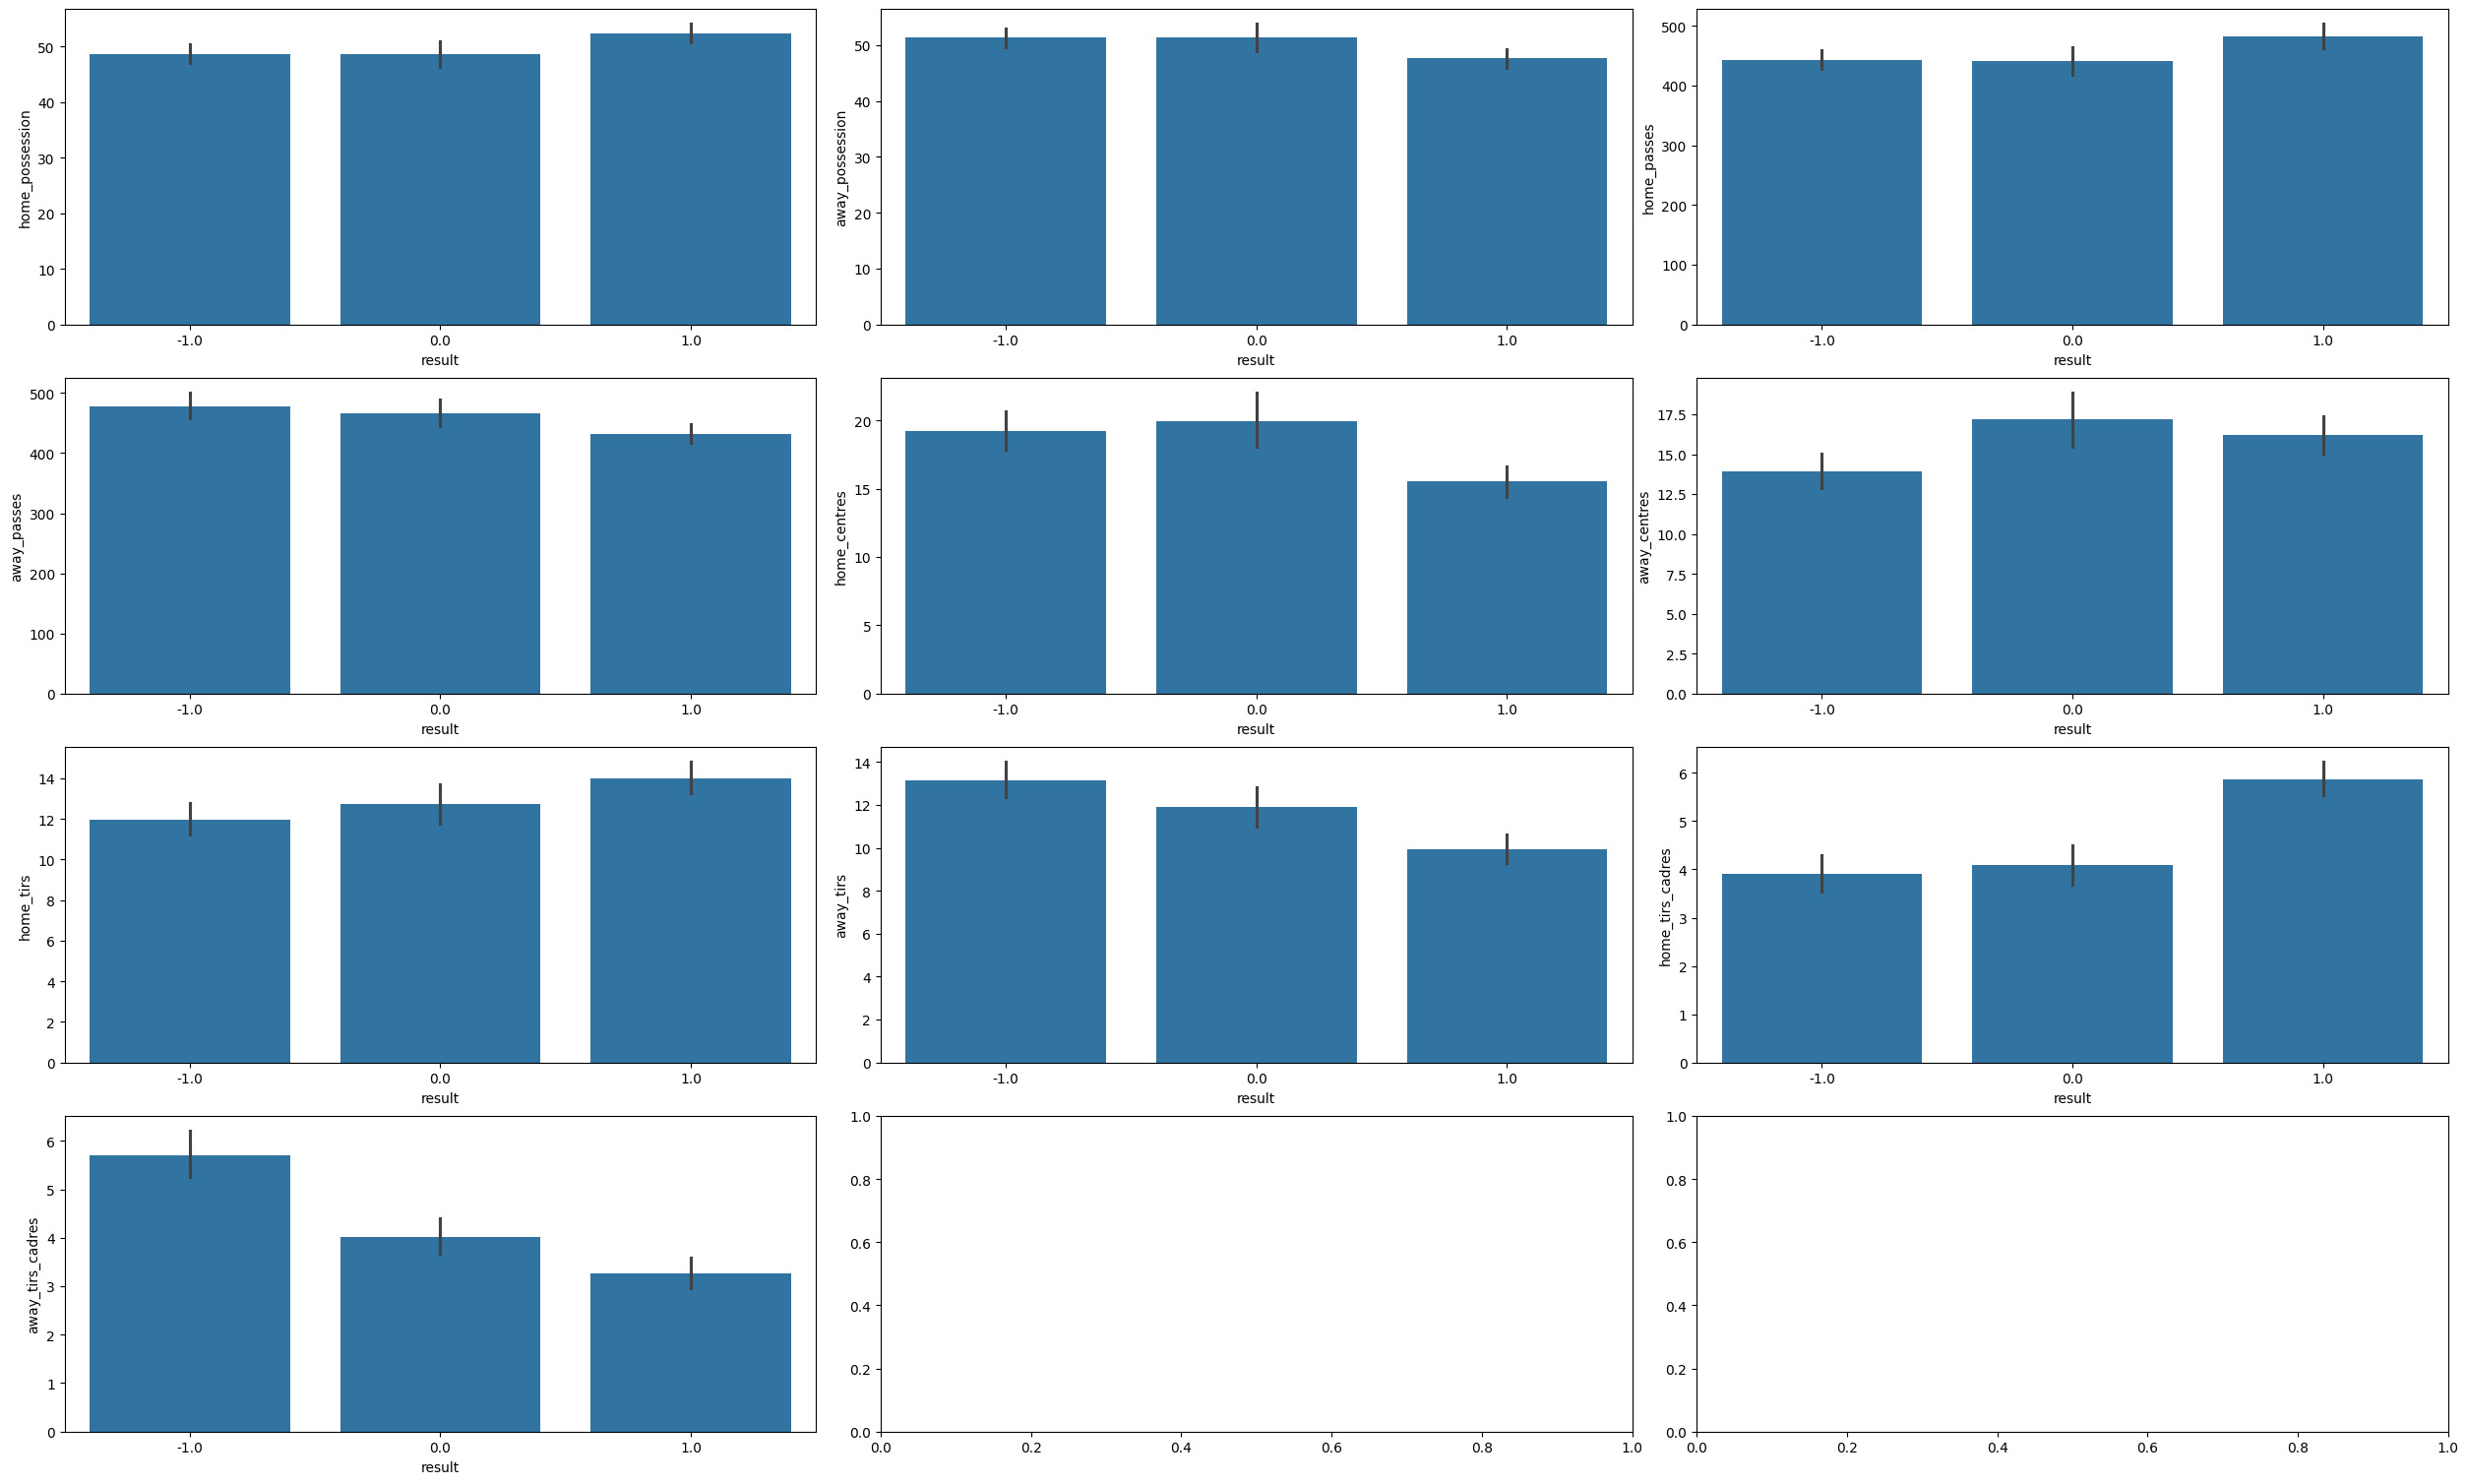

In [13]:
fig, ax = plt.subplots(ncols=3, nrows=4, figsize=(25, 15))
ax = ax.flatten()
index=0
for i in dataset.columns:
  if i != 'result':
    sns.barplot(x='result', y=i, data=dataset, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.4)
plt.show

All the features in our dataset have different impacts on the result.  
Here, "home_passes" is less useful because we can see that the values are not proportional to the label. In fact, this feature doesn't really help us to know whether there is a draw or a defeat. However, this type of data isn't totally useless, as we can see that with a high rate, it's closer to a 1 or win label. 

Whereas with the "away_tirs_cadres" column, we can easily draw a downward curve and say that the more shots on target the away team has, the more likely it is that the home team will lose. This data is therefore easier to process and analyse.

So with this sequence of diagrams, we can see that certain data are more or less interesting and impact the prediction of the result.

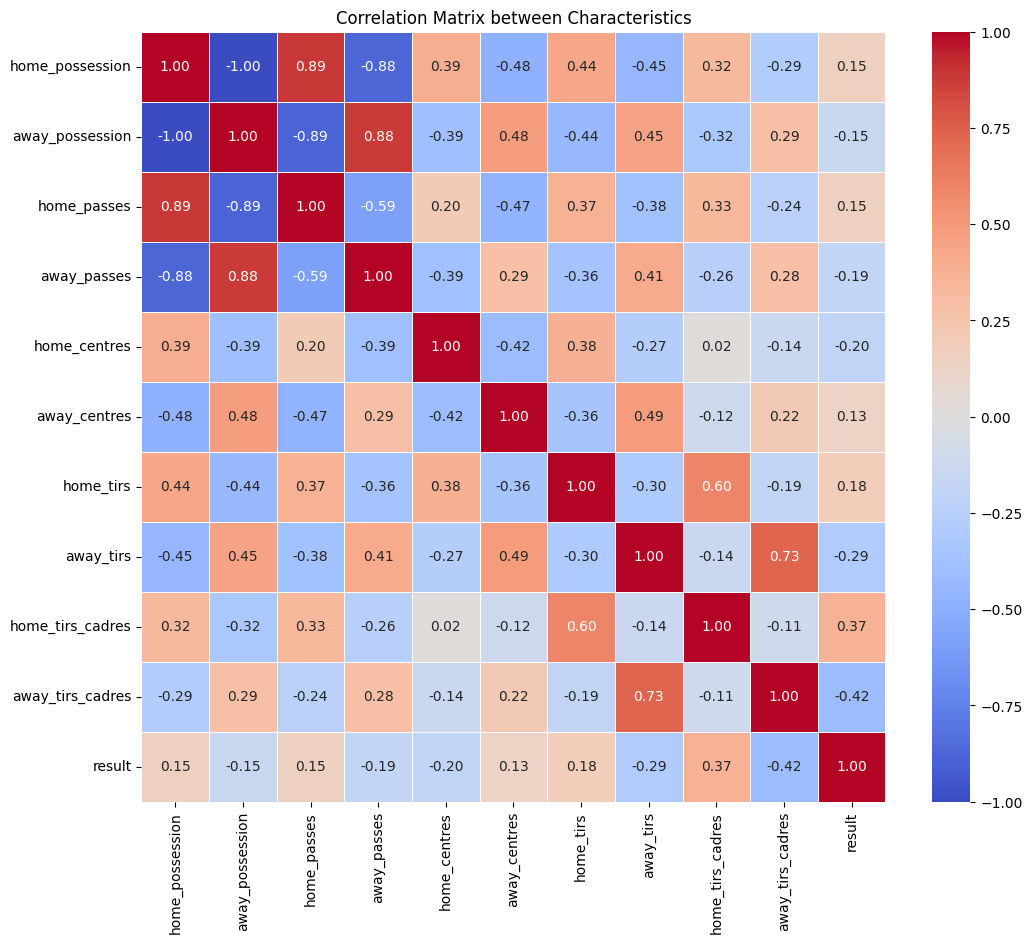

In [14]:
correlation_matrix = dataset.corr()

# Afficher une heatmap de la matrice de corrélation
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix between Characteristics")
plt.show()

This heatmap of the correlation matrix shows that all the remaining columns are more or less correlated with the result, which is a good thing for result prediction.

<h1>Feature Scaling</h1>

In [15]:
def normalized(dataset):
    scaler = MinMaxScaler()
    dataset_normalized = pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)
    return dataset_normalized

In [16]:
dataset = normalized(dataset)
dataset

,home_possession,away_possession,home_passes,away_passes,home_centres,away_centres,home_tirs,away_tirs,home_tirs_cadres,away_tirs_cadres,result
0,0.549729,0.450271,0.500000,0.349158,0.239130,0.533333,0.413793,0.466667,0.615385,0.466667,0.0
1,0.473779,0.526221,0.358766,0.379786,0.673913,0.400000,0.310345,0.433333,0.307692,0.333333,0.0
2,0.430380,0.569620,0.290584,0.358346,0.347826,0.333333,0.275862,0.433333,0.461538,0.333333,1.0
3,0.383363,0.616637,0.243506,0.359877,0.217391,0.400000,0.344828,0.300000,0.461538,0.200000,1.0
4,0.613020,0.386980,0.551948,0.309342,0.217391,0.266667,0.586207,0.133333,0.615385,0.133333,0.5
...,...,...,...,...,...,...,...,...,...,...,...
373,0.432188,0.567812,0.422078,0.485452,0.239130,0.400000,0.275862,0.200000,0.461538,0.133333,1.0
374,0.600362,0.399638,0.725649,0.441041,0.108696,0.222222,0.344828,0.100000,0.307692,0.066667,1.0
375,0.267631,0.732369,0.272727,0.621746,0.173913,0.377778,0.241379,0.533333,0.230769,0.466667,0.0
376,0.345389,0.654611,0.204545,0.359877,0.130435,0.711111,0.344828,0.733333,0.461538,0.400000,1.0


Here, we normalise all the data so that they are all between 0 and 1. The aim of this technique is to ensure that all the columns have the same importance, the same weight, when using the different prediction algorithms.

# Prediction Algorithm

In [17]:
X = dataset.iloc[:, 0:9].values
y = result.iloc[:, 2].values

total_accuracy = []

<h1>RandomForest</h1>

**Preparing data**

The following code divides data into training and testing sets:

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# or with stratify
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In the code above, the ``test_size`` parameter specifies the ratio of the test set, which we use to split up 20% of the data in to the test set and 80% for training.

Let's try normalize the data.

In [19]:
from sklearn.preprocessing import MinMaxScaler

# sc = MinMaxScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.fit_transform(X_test)

**Training and Making Predictions**

And again, now that we have scaled our dataset, we can train our random forests to solve this classification problem. To do so, execute the following code:

In [20]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Let's make predictions on the test data

In [21]:
y_pred = classifier.predict(X_test)

**Evaluating the Algorithm**

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
cm = confusion_matrix(y_test, y_pred, labels=[-1,0,1])
confusion = pd.DataFrame(cm, index=['Won', 'Draw', 'Lost'],
                         columns=['Predicted Won','Predicted Draw', 'Predicted Lost'])
confusion

,Predicted Won,Predicted Draw,Predicted Lost
Won,13,6,9
Draw,6,4,10
Lost,6,0,22


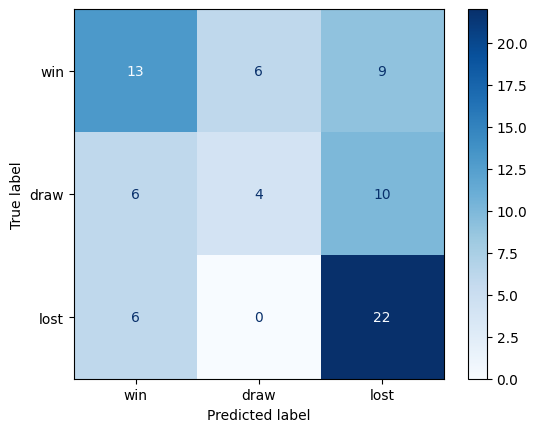

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
# display the confusion matrix using sklearn (we could also use seaborn)
cm_fig = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['win', 'draw', 'lost'])
cm_fig.plot(cmap='Blues')

In [24]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
total_accuracy.append(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.52      0.46      0.49        28
         0.0       0.40      0.20      0.27        20
         1.0       0.54      0.79      0.64        28

    accuracy                           0.51        76
   macro avg       0.49      0.48      0.46        76
weighted avg       0.49      0.51      0.49        76

0.5131578947368421


Despite an accuracy of 51.3%, this performance is still below expectations, indicating insufficient results for predicting match outcomes. As a result, we need to explore other, more efficient algorithms to improve the accuracy of our predictions.

<h1>SVM : Support Vector Machines</h1>

**Importing libraries**

In [25]:
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

**Preparing data**


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Training and Making Predictions**

This line creates an SVM model with predefined parameters for use in supervised learning on training data. We then train and predict results for this model.

In [27]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=0)

In [28]:
svm_model.fit(X_train, y_train)

SVC(random_state=0)

In [29]:
y_pred = svm_model.predict(X_test)

**Evaluating the Algorithm**

In [30]:
accuracy_svm = svm_model.score(X_test, y_test)
print(f"Model accuracy : {accuracy_svm * 100}%")
total_accuracy.append(accuracy_svm)

Model accuracy : 65.78947368421053%


Despite being 65.7% more accurate than RandomForest, this performance is still below expectations, indicating insufficient results for predicting match outcomes. As a result, we need to explore other, more efficient algorithms to improve the accuracy of our predictions.

<h1>Neural Networks</h1>

**Importing libraries**

In [31]:
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

**Preparing data**

These three lines of code prepare the data for use with a neural network algorithm by dividing the dataset into training and test sets, and encoding the class labels (target variable) into numerical values using LabelEncoder.

In [32]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

These three lines of code are used to prepare the class labels (y_train and y_test) for use in a neural network algorithm using the Keras library.

In [33]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
model = Sequential()

Adding layers to the neural network

**Training and Making Predictions**


In [34]:
model.add(Dense(64, input_shape=(X.shape[1],), activation='relu'))  # Couche d'entrée avec 64 neurones et fonction d'activation relu
model.add(Dense(32, activation='relu'))  # Couche cachée avec 32 neurones et fonction d'activation relu
model.add(Dense(3, activation='softmax'))  # Couche de sortie avec 3 neurones pour les 3 catégories et fonction d'activation softmax

In [35]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # Compilation du modèle

In [36]:
model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/200


10/10 [==============================] - 2s 54ms/step - loss: 1.1113 - accuracy: 0.2815 - val_loss: 1.0896 - val_accuracy: 0.3289
Epoch 2/200
10/10 [==============================] - 0s 11ms/step - loss: 1.0811 - accuracy: 0.4371 - val_loss: 1.0558 - val_accuracy: 0.5658
Epoch 3/200
10/10 [==============================] - 0s 12ms/step - loss: 1.0565 - accuracy: 0.4305 - val_loss: 1.0258 - val_accuracy: 0.5132
Epoch 4/200
10/10 [==============================] - 0s 13ms/step - loss: 1.0400 - accuracy: 0.4238 - val_loss: 0.9992 - val_accuracy: 0.5526
Epoch 5/200
10/10 [==============================] - 0s 12ms/step - loss: 1.0236 - accuracy: 0.4735 - val_loss: 0.9784 - val_accuracy: 0.6053
Epoch 6/200
10/10 [==============================] - 0s 10ms/step - loss: 1.0130 - accuracy: 0.4901 - val_loss: 0.9611 - val_accuracy: 0.5921
Epoch 7/200
10/10 [==============================] - 0s 12ms/step - loss: 0.9974 - accuracy: 0.5265 - val_loss: 0.9517 - val_accuracy: 0.6053
Epoc

In [37]:
loss, accuracy_nn = model.evaluate(X_test, y_test)
print(f"Model accuracy : {accuracy_nn * 100}%")

total_accuracy.append(accuracy_nn)

3/3 [==============================] - 0s 6ms/step - loss: 0.8093 - accuracy: 0.6447
Model accuracy : 64.47368264198303%


Although still more accurate than RandomForest, this performance falls short of expectations, indicating insufficient results for predicting match outcomes. As a result, we need to explore other, more efficient algorithms to improve the accuracy of our predictions.

<h1>Naive Bayes</h1>

**Importing libraries**

In [38]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder

**Preparing data**


In [39]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Training and Making Predictions**


In [40]:
# Initialize the multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the model
nb_classifier.fit(X_train, y_train)

# Predict results on test set
predictions = nb_classifier.predict(X_test)

**Evaluating the algorithm**

In [41]:
# Evaluate model performance
accuracy_nb = nb_classifier.score(X_test, y_test)
print(f"Model accuracy : {accuracy_nb * 100}%")
total_accuracy.append(accuracy_nb)

Model accuracy : 53.94736842105263%


This accuracy is still not good enough. Let's use a new algorithm

<h1>Gradient Boosting Machines</h1>

**Importing libraries**

In [42]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

**Preparing data**


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Training and Making Predictions**


In [44]:
# Initializing
xgboost_classifier = xgb.XGBClassifier()

# Training model
xgboost_classifier.fit(X_train, y_train)

# Predictions of the tests
predictions = xgboost_classifier.predict(X_test)

**Evaluating the Algorithm**

In [45]:
# Evaluate our predictions
accuracy_gbm = xgboost_classifier.score(X_test, y_test)
print(f"Model accuracy : {accuracy_gbm* 100}%")

total_accuracy.append(accuracy_gbm)

Model accuracy : 55.26315789473685%


Accuracy still not high enough

# Decision tree

**Importing libraries**

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder


**Preparing data**


In [47]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Training and Making Predictions**


In [48]:
# Initialize the decision tree model
tree_classifier = DecisionTreeClassifier()

# Train the model
tree_classifier.fit(X_train, y_train)

# Predict results on test set
predictions = tree_classifier.predict(X_test)

**Evaluating the Algorithm**

In [49]:
# Evaluate model performance
accuracy_dt = tree_classifier.score(X_test, y_test)
print(f"Model accuracy : {accuracy_dt* 100}%")
total_accuracy.append(accuracy_dt)

Model accuracy : 47.368421052631575%


This precision is too low to be retained.

<h1>Multinomial Logistic Regression</h1>

**Importing libraries**

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

**Preparing data**


In [51]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Training and Making Predictions**

In [52]:
# Initialize the multinomial logistic regression model
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Train the model
logreg.fit(X_train, y_train)

# Predict results on test set
predictions = logreg.predict(X_test)

**Evaluating the Algorithm**

In [53]:
# Evaluate model performance
accuracy_rlm = logreg.score(X_test, y_test)
print(f"Model accuracy : {accuracy_rlm* 100}%")

total_accuracy.append(accuracy_rlm)

Model accuracy : 72.36842105263158%


Having achieved an accuracy of over 70%, we can stop here, even if this accuracy is far from reliable.  

<h1>Viewing results</h1>


To visualise the different accuracies obtained, we set up a Heatmap

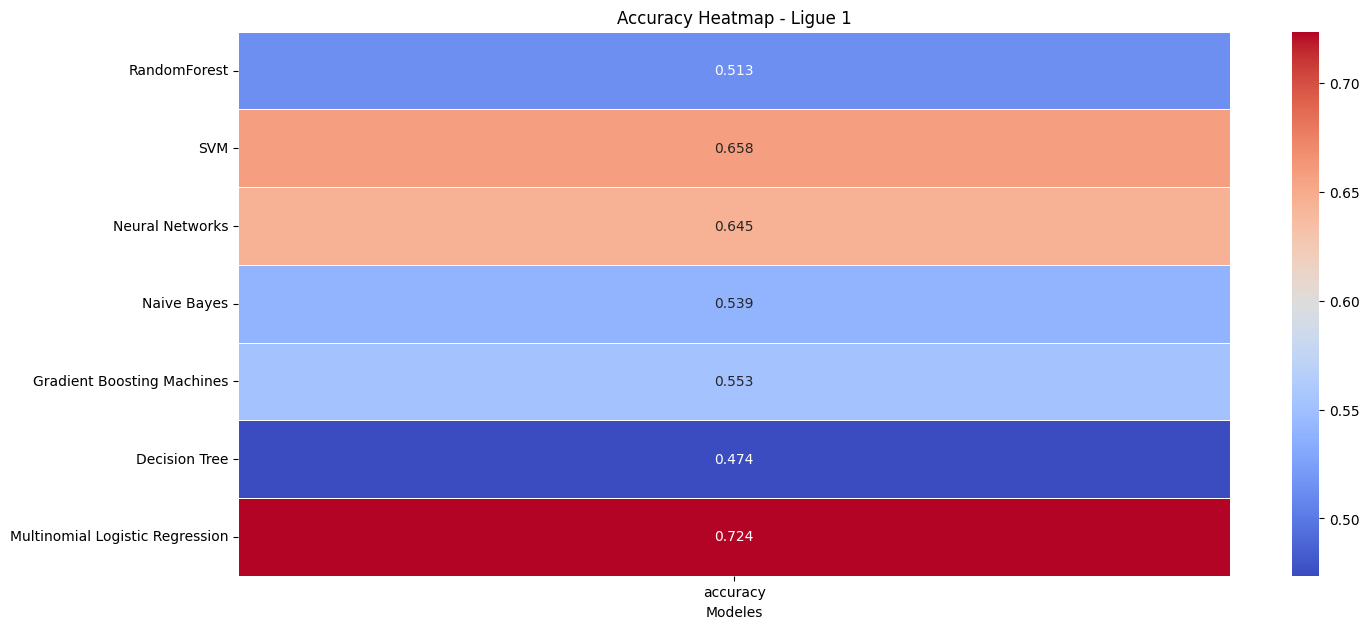

In [54]:
#Model names
models = ['RandomForest', 'SVM', 'Neural Networks', 'Naive Bayes', 'Gradient Boosting Machines', 'Decision Tree', 'Multinomial Logistic Regression']

#Pre-treatment names
preprocessing = ['accuracy']

#Creating a DataFrame with data
df = pd.DataFrame(total_accuracy, columns=preprocessing, index=models)

#Using Seaborn to create a heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(df, annot=True, cmap='coolwarm', fmt=".3f", linewidths=.5)

#Add a legend on the x axis
plt.xlabel('Modeles')

#Adjust the position of the layout to leave more space at the bottom
plt.subplots_adjust(bottom=0.2)

plt.title('Accuracy Heatmap - Ligue 1')
plt.show()

Among all these algorithms, we can only use the last one which is “Miltinomial Logistic Regression”. This lack of precision can be explained in several ways: We are trying to predict football results. This sport is very unpredictable where the weakest on paper can win against the strongest, it is also possible that the one who has all the statistics in his favor can lose to his opponent. These situations are not uncommon and can be seen in many matches. This therefore explains the low accuracy of the different algorithms used, because it is hard to generalize.